In [1]:
#Loading the DataSet

import pandas as pd
df=pd.read_csv('diabetes.csv')
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
# Finding missing values if any
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

AxesSubplot(0.125,0.125;0.775x0.755)


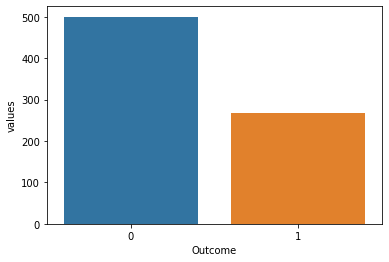

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

temp=df["Outcome"].value_counts()
temp_df= pd.DataFrame({'Outcome': temp.index,'values': temp.values})
print(sns.barplot(x = 'Outcome', y="values", data=temp_df))

In [42]:
# Fining correlations to ensure that all values effect outcome
corr=df.corr()
print(corr)

                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   
Outcome                      0.221898  0.466581       0.065068       0.074752   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.033523   
Glucose                   0.331357  0.221

AxesSubplot(0.125,0.125;0.62x0.755)


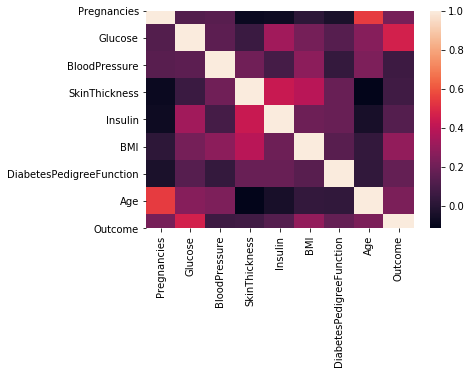

In [5]:
# Heatmap for better representation
heatmap=sns.heatmap(corr, 
         xticklabels=corr.columns, 
         yticklabels=corr.columns)
print(heatmap)

In [74]:
y=df['Outcome']
x=df.drop(['Outcome','DiabetesPedigreeFunction'],axis=1)

In [75]:
# Apply smote
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=589)
X,Y=sm.fit_sample(x,y)

In [76]:
# Test-Train Split
from sklearn.model_selection  import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20, random_state = 5)

In [77]:
list_met=[]
list_accuracy=[]
# Applying all the algorithms

In [78]:
# Apply Logistic Regression


In [79]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

classifier = LogisticRegression(C=0.4,max_iter=1000,solver='liblinear')
lr=classifier.fit(x_train, y_train)
#Preciction
y_pred = classifier.predict(x_test)
#Accuracy
accuracy_LR= accuracy_score(y_test, y_pred)



In [80]:
# Apply Decison Tree


In [81]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

classifier2 = DecisionTreeClassifier(random_state=14)
dt=classifier2.fit(x_train, y_train)
#Preciction
y_pred2 = classifier2.predict(x_test)
#Accuracy
accuracy_DT= accuracy_score(y_test, y_pred2)


In [82]:
# Apply Random Forest criteria=information gain

In [83]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

classifier3 = RandomForestClassifier(random_state=14)
rfi=classifier3.fit(x_train, y_train)
#Preciction
y_pred3 = classifier3.predict(x_test)
#Accuracy
accuracy_RFI= accuracy_score(y_test, y_pred3)


In [84]:
# Apply Random Forest criteria=entropy

In [85]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

classifier4 = RandomForestClassifier(criterion='entropy')
rfe=classifier4.fit(x_train, y_train)
#Preciction
y_pred4 = classifier4.predict(x_test)
#Accuracy
accuracy_RFE= accuracy_score(y_test, y_pred4)


In [86]:
# similarly apply SVM

In [87]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

model_svm = SVC(cache_size=100)
svm=model_svm.fit(x_train, y_train)
#Preciction
y_pred5 = model_svm.predict(x_test)
#Accuracy
accuracy_svc= accuracy_score(y_test, y_pred5)


In [88]:
# Apply KNN

In [89]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

model_knn3 = KNeighborsClassifier(n_neighbors=3)
knn=model_knn3.fit(x_train,y_train)
# Predicting Test Set N=3
pred_knn3= model_knn3.predict(x_test)
#Accuracy
accuracy_SVM = accuracy_score(y_test, pred_knn3)


In [90]:
#Apply Gaussian Naive Bayes

In [91]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

gnb = GaussianNB()
gnb=gnb.fit(x_train, y_train)
# Predicting Test Set
pred_gnb = gnb.predict(x_test)
#accuracy
accuracy_GNB = accuracy_score(y_test, pred_gnb)


In [92]:
#Apply Bernoulli Naive Bayes

In [93]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

model = BernoulliNB()
bnb=model.fit(x_train, y_train)
# Predicting Test Set
pred_bnb = model.predict(x_test)
#accuracy
accuracy_BNB = accuracy_score(y_test, pred_bnb)


In [94]:
# Combining all the above using voting classifier

In [95]:
from sklearn.ensemble import VotingClassifier

evc=VotingClassifier(estimators=[('lr', lr), ('rfi', rfi),('rfe', rfe), ('DT', dt),
                                 ('svm',svm),('knn',knn),('gnb',gnb),('bnb',bnb)],voting='hard',
                                 flatten_transform=True)

model_evc=evc.fit(x_train, y_train)
# Predicting Test Set
pred_evc = evc.predict(x_test)
#accuracy
accuracy_evc = accuracy_score(y_test, pred_gnb)


In [96]:
list1=['Logistic Regression','Decison Tree','Random Forest(information gain)','Random Forest(Entropy)','SVM','KNN','gnb','bnb','voting classifier']

In [97]:
list2=[accuracy_LR,accuracy_DT,accuracy_RFI,accuracy_RFE,accuracy_svc,accuracy_SVM,accuracy_GNB,accuracy_BNB,accuracy_evc]
list3=[classifier,classifier2,classifier3,classifier4,model_svm,model_knn3,gnb,model]

In [98]:
df_Accuracy=pd.DataFrame({'Method Used':list1,'Accuracy': list2})
print(df_Accuracy)

                       Method Used  Accuracy
0              Logistic Regression     0.710
1                     Decison Tree     0.720
2  Random Forest(information gain)     0.780
3           Random Forest(Entropy)     0.790
4                              SVM     0.735
5                              KNN     0.720
6                              gnb     0.720
7                              bnb     0.455
8                voting classifier     0.720


AxesSubplot(0.125,0.125;0.775x0.755)


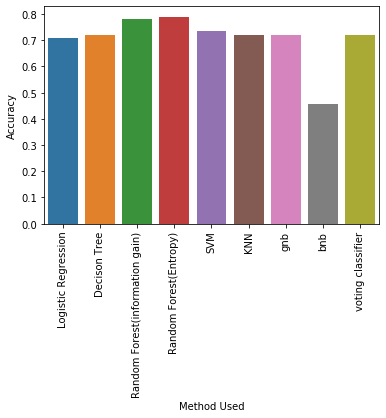

In [99]:
chart=sns.barplot(x='Method Used',y='Accuracy',data=df_Accuracy)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
print(chart)

In [100]:
# To find pedigree function

In [101]:
df_reg=df.drop('Outcome',axis=1)
df_reg.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [102]:
corr_reg=df.corr()
print(corr_reg)

                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   
Outcome                      0.221898  0.466581       0.065068       0.074752   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.033523   
Glucose                   0.331357  0.221

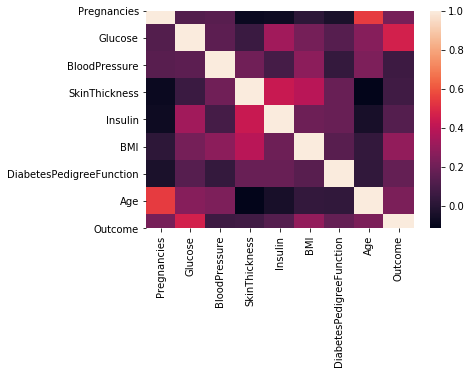

In [103]:
# Heatmap for better representation
sns.heatmap(corr, 
         xticklabels=corr.columns, 
         yticklabels=corr.columns)

In [104]:
y=df_reg['DiabetesPedigreeFunction']
x=df_reg.drop('DiabetesPedigreeFunction',axis=1)

In [105]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.20,random_state=5) 

#create the regression
lr_model = LinearRegression().fit(x_train,y_train)
#predict values
pred = lr_model.predict(x_test)
# finding accuracy ie r squared value
accuracy=lr_model.score(x_test,y_test)

accuracy

0.022890588997063754

In [110]:
# Peigree estimations are incorrect. although heat map indicates very deep correlations between the variables. so we drop it

In [107]:
# Creating input

In [113]:
# Creating input

import pandas as pd
import random
import time


def prediction():
    '''
    input1=input("Enter no. of Pregnencies :")
    input2=input("Enter glucose level :")
    input3=input("Enter blood pressure :")
    input4=input("Enter skin thickness :")
    input5=input("Enter insulin level :")
    input6=input("Enter bmi :")
    input7=input("Enter age :")
    '''
    input1= random.randrange(0, 41)     #Number of times pregenant
    input2= random.randrange(0, 201)    #Gloucouse level
    input3= random.randrange(0, 111)     #Average heart level
    input4= random.randrange(1, 60)     #Skin thickness
    input5= random.randrange(0, 251)     #Insuline level
    input6= random.randrange(15, 46)     #BMI
    input7= random.randrange(1, 101)    #Age
    
    start = time.time()

    list_preg=[]
    list_gluc=[]
    list_blood_pressure=[]
    list_skin_thickness=[]
    list_insulin=[]
    list_bmi=[]
    list_age=[]
    list_pedigree=[]

    list_preg.append(input1)
    list_gluc.append(input2)
    list_blood_pressure.append(input3)
    list_skin_thickness.append(input4)
    list_insulin.append(input5)
    list_bmi.append(input6)
    list_age.append(input7)


    input_df=pd.DataFrame({"Enter no. of Pregnencies :":list_preg , "Enter glucose level :":list_gluc ,
                              "Enter blood pressure :":list_blood_pressure , "Enter skin thickness :":list_skin_thickness ,
                             "Enter insulin level :":list_insulin , "Enter bmi :":list_bmi , "Enter age :":list_age
                             })
    
    max_acc=max(list2)
    
    for i in range(0,len(list2)):
        if(list2[i]==max_acc):
            sel_model=list3[i]
            
    prediction=sel_model.predict(input_df)

    if(prediction==0):
        print("You are safe")
        print('our output is accurate by: ' + str(max_acc*100)+'%')

    elif(prediction==1):
        print("Doesnt look good,Please confirm with doctor")
        print('our output is accurate by: ' + str(max_acc*100)+'%')
        
    end = time.time()
    
    print('time to calculate: '+str(end- start)+' mili Seconds')

prediction()

Doesnt look good,Please confirm with doctor
our output is accurate by: 79.0%
time to calculate: 0.0359807014465332 mili Seconds
